In [1]:
import custom
import create_model
from importlib import reload

In [2]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


img_dir = "images/"
mask_dir = "labels/"
image_extension = ".png"
mask_extension = ".png"
img_size = (256, 256)
batch_size = 16
horizontal_split = 12
vertical_split = 1

#from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess
#from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess
preprocess_fcn = preprocess

train, validation = CustomDataGenerator.generate_data(batch_size, img_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed, single_img=single_img)

Number of samples:  5443
Classes: [0 1]
Number of samples:  605
Classes: [0 1]


In [3]:
img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

-1.0
0.94509804
0.0
1.0
[0 1]


In [4]:
import segmentation_models as sm

BACKBONE = 'mobilenetv2'
# define model
# YOUR CODE HERE
model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=1, input_shape=(256,256,3))
#raise NotImplementedError()

# and compile it
model.compile('adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
model.summary()

Segmentation Models: using `tf.keras` framework.


/home/jfra/.local/lib/python3.8/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [5]:
history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1, shuffle=True)

Epoch 1/20
20/20 [==============================] - 313s 14s/step - loss: 1.0603 - iou_score: 0.5017 - val_loss: 4.3361 - val_iou_score: 0.6768
Epoch 2/20
20/20 [==============================] - 243s 12s/step - loss: 0.4003 - iou_score: 0.8014 - val_loss: 6.5759 - val_iou_score: 0.3094
Epoch 3/20
20/20 [==============================] - 218s 11s/step - loss: 0.3178 - iou_score: 0.8598 - val_loss: 4.4117 - val_iou_score: 0.5425
Epoch 4/20
20/20 [==============================] - 247s 12s/step - loss: 0.3135 - iou_score: 0.8690 - val_loss: 9.6903 - val_iou_score: 0.0576
Epoch 5/20
20/20 [==============================] - 271s 14s/step - loss: 0.2448 - iou_score: 0.9042 - val_loss: 10.5745 - val_iou_score: 5.5056e-05
Epoch 6/20
20/20 [==============================] - 211s 11s/step - loss: 0.2011 - iou_score: 0.9155 - val_loss: 8.2099 - val_iou_score: 0.0048
Epoch 7/20
20/20 [==============================] - ETA: 0s - loss: 0.3265 - iou_score: 0.8854

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

1/1 [==============================] - 3s 3s/step


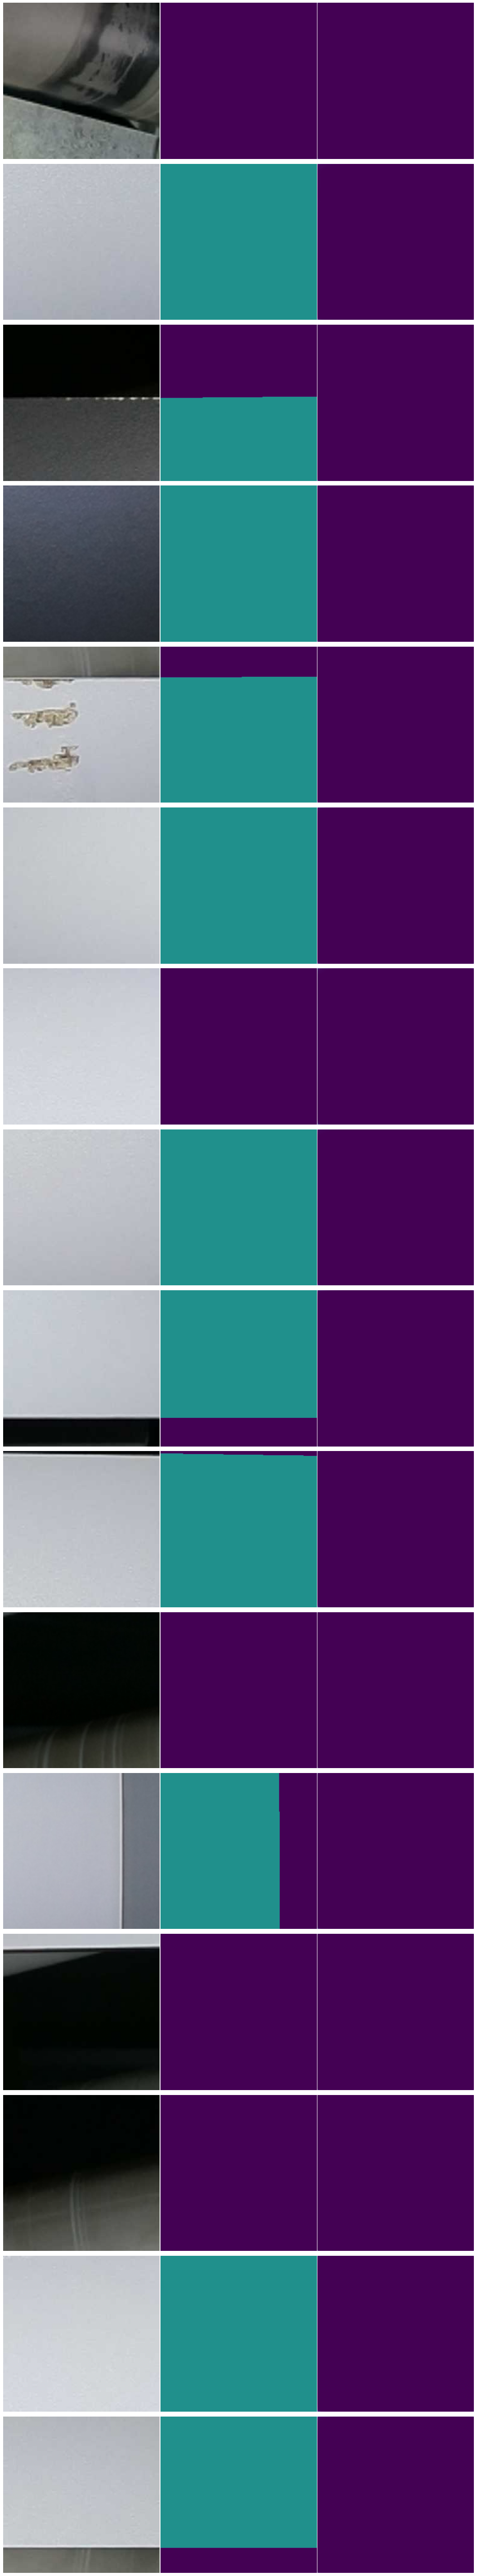

In [6]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)